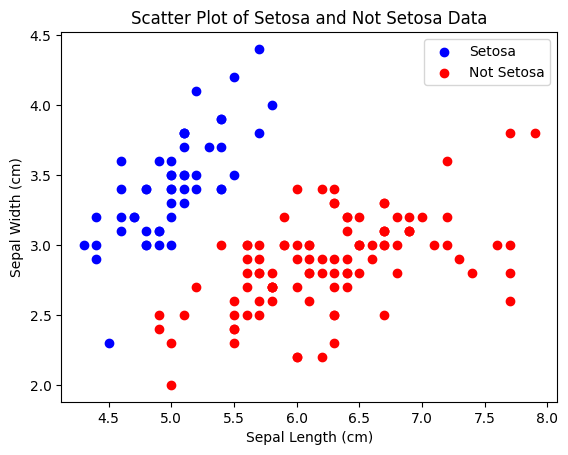

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame from the dataset
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Create a new column to represent the two classes: Setosa and non-Setosa
data['class'] = data['target'].apply(lambda x: 'Setosa' if x == 0 else 'Not Setosa')

# Separate Setosa and non-Setosa data
setosa_data = data[data['class'] == 'Setosa']
not_setosa_data = data[data['class'] == 'Not Setosa']
# # Separate Setosa and non-Setosa data
# setosa_data = data[data['class'] == 'Setosa']
# not_setosa_data = data[data['class'] == 'Not Setosa']

# Scatter plot for Setosa data
plt.scatter(setosa_data['sepal length (cm)'], setosa_data['sepal width (cm)'], label='Setosa', color='blue')

# Scatter plot for non-Setosa data
plt.scatter(not_setosa_data['sepal length (cm)'], not_setosa_data['sepal width (cm)'], label='Not Setosa', color='red')

# Add labels and legend
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot of Setosa and Not Setosa Data')
plt.legend()

# Show the plot
plt.show()


In [10]:

def RandomInitialize(sm):
    np.random.seed(100)
    w = np.random.rand(1, 4) * sm  # Since Iris dataset has 4 features
    b = np.zeros(1)
    print(f"Initial w={w}, Initial b={b}")
    return w, b

def sgn(net):
    if net >= 0:
        return 1
    else:
        return -1

# Compute yin = net = w.x + b
def Forward(w, x, b):
    net = np.dot(w, x) + b
    h = sgn(net)
    return h, net

# Update - sgn
def DeltaUpdate(w, b, x, t, net, alpha):
    t = t.reshape(1,)
    x = x.reshape(1, 4)  # Adjust for Iris dataset (4 features)
    delta_w = alpha * np.dot((t - net), x)
    delta_b = alpha * (t - net)
    w = w + delta_w
    b = b + delta_b
    return w, b

# Compute Cost Function - sgn
def sgnCost(t, net):
    error = 0.5 * np.power((t - net), 2)
    return error

def SeparationLine(start, end, w, b):
    x = np.linspace(start, end)
    y = -(w[0, 1] * x + b) / w[0, 2]  # Adjust for Iris dataset (3rd feature)
    return x, y

# Training Function
def Adaline(x, y, max_iter, learning_rate, samples):
    cost_list = []
    eps = 0.00005  # End criteria
    sm = 0.001  # In order to make small weights
    w, b = RandomInitialize(sm)  # Step 0
    print(f"Hyperparams are: ", f"eps={eps}, max_iter={max_iter}, learning_rate={learning_rate}, sm={sm}")
    for i in range(max_iter):  # Step 1
        h, net = Forward(w, np.asarray(x[i % samples]), b)  # Step 3

        cost = sgnCost(np.asarray(y[i % samples]), net)

        # After an Epoch
        if i % samples == 0 and i != 0:  # Step 5
            cost_list.append(cost)
            error = np.mean(cost_list)
            print('Epoch %d / %d - Error: %f' % (len(cost_list), int(max_iter / samples), error))
            print('w:', w)
            print('b:', b)
            if error <= eps:
                return w, b, cost_list

        w, b = DeltaUpdate(w, b, np.asarray(x[i % samples]), np.asarray(y[i % samples]), net, learning_rate)  # Step 4

    return w, b, cost_list  # Step 6



In [3]:
# Extract features and labels for Setosa and Not Setosa
setosa_features = setosa_data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
not_setosa_features = not_setosa_data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

# Create labels (1 for Setosa and -1 for Not Setosa)
setosa_labels = np.ones(len(setosa_features))
not_setosa_labels = -np.ones(len(not_setosa_features))

# Combine the data and labels
x = np.vstack((setosa_features.values, not_setosa_features.values))
y = np.hstack((setosa_labels, not_setosa_labels))

# Define hyperparameters
max_iter = 10000
learning_rate = 0.011  # Specify the learning rate
samples = 150  # Updated to 150

# iterate over hyperparameters and plot the error curve for a specific learning rate
w, b, error_lst = Adaline(x, y, max_iter=max_iter, learning_rate=learning_rate, samples=samples)
itr = range(1, len(error_lst) + 1)



Initial w=[[0.00543405 0.00278369 0.00424518 0.00844776]], Initial b=[0.]
Hyperparams are:  eps=5e-05, max_iter=10000, learning_rate=0.011, sm=0.01
Epoch 1 / 66 - Error: 1.237928
w: [[-0.07510353 -0.01540316 -0.0863859  -0.02670704]]
b: [-0.01026475]
Epoch 2 / 66 - Error: 1.085357
w: [[-0.05209339  0.02710987 -0.13117458 -0.05097173]]
b: [-0.00122803]
Epoch 3 / 66 - Error: 0.966599
w: [[-0.034446    0.05932129 -0.16494822 -0.07041706]]
b: [0.00551416]
Epoch 4 / 66 - Error: 0.872597
w: [[-0.02090756  0.08371515 -0.19033883 -0.08614263]]
b: [0.01050763]
Epoch 5 / 66 - Error: 0.797029
w: [[-0.01051979  0.10218046 -0.20935186 -0.09898966]]
b: [0.01416836]
Epoch 6 / 66 - Error: 0.735415
w: [[-0.00254994  0.11615326 -0.22351529 -0.10960215]]
b: [0.01681345]
Epoch 7 / 66 - Error: 0.684531
w: [[ 0.00356258  0.12672477 -0.23399328 -0.11847356]]
b: [0.01868459]
Epoch 8 / 66 - Error: 0.642019
w: [[ 0.00824696  0.13472379 -0.24167268 -0.12598241]]
b: [0.01996603]
Epoch 9 / 66 - Error: 0.606127
w: 

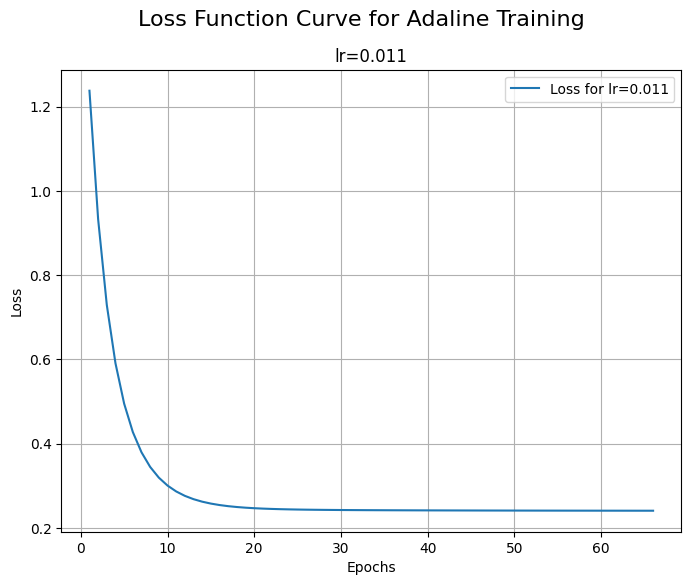

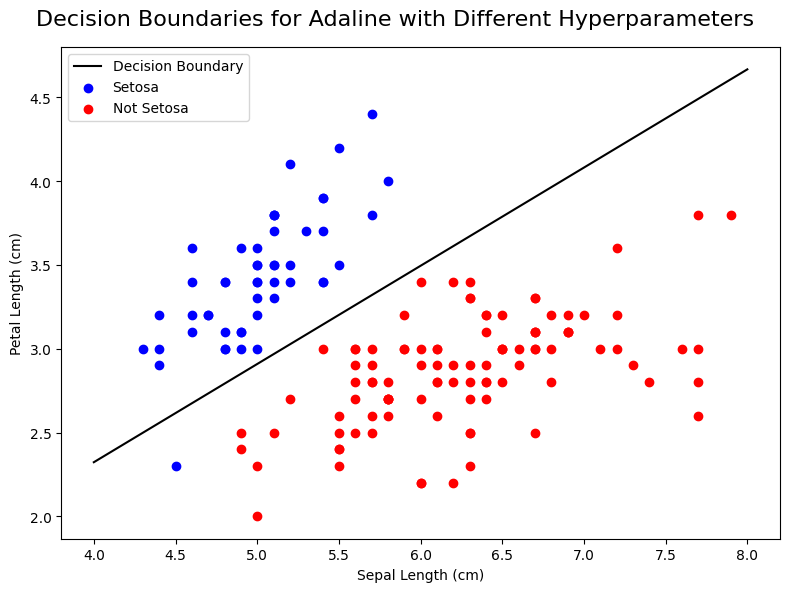

In [4]:
# create a subplot for a single loss curve
fig, axs = plt.subplots(1, 1, figsize=(8, 6))

# set the figure title
fig.suptitle('Loss Function Curve for Adaline Training', fontsize=16)
axs.plot(itr, np.squeeze(error_lst), label=f'Loss for lr={learning_rate}')

# add axis labels
axs.set_title(f'lr={learning_rate}', fontsize=12)
axs.set_xlabel('Epochs')
axs.set_ylabel('Loss')

# add grid
axs.grid(True)

# adjust tick label font size
axs.tick_params(axis='both', which='major', labelsize=10)

# add legend
axs.legend(loc='upper right')

# save the figure
# plt.savefig("LossFunctionCurve_LR_0.01.pdf")

# show the plot
plt.show()
# create subplots for decision boundaries
fig2, axs2 = plt.subplots(1,1, figsize=(8, 6))

# set the figure title
fig2.suptitle('Decision Boundaries for Adaline with Different Hyperparameters', fontsize=16)

# plot the weight and bias separation lines

px1, px2 = SeparationLine(4, 8, w, b)
axs2.plot(px1, px2, label='Decision Boundary', color='black')
# Scatter plot for Setosa data
axs2.scatter(setosa_data['sepal length (cm)'], setosa_data['sepal width (cm)'], label='Setosa', color='blue')

# Scatter plot for non-Setosa data
axs2.scatter(not_setosa_data['sepal length (cm)'], not_setosa_data['sepal width (cm)'], label='Not Setosa', color='red')
# Set labels and legend
axs2.set_xlabel('Sepal Length (cm)')
axs2.set_ylabel('Petal Length (cm)')
axs2.legend(loc='upper left')

# adjust subplot spacing
fig2.tight_layout()


# show the plot
plt.show()

# versicolor and non versicolor

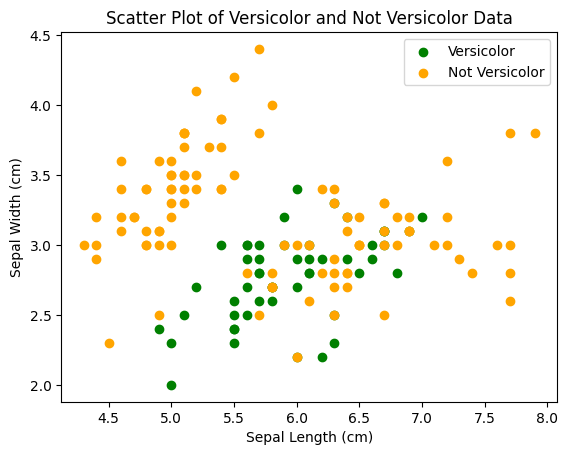

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame from the dataset
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Create a new column to represent the two classes: Versicolor and non-Versicolor
data['class'] = data['target'].apply(lambda x: 'Versicolor' if x == 1 else 'Not Versicolor')

# Separate Versicolor and non-Versicolor data
versicolor_data = data[data['class'] == 'Versicolor']
not_versicolor_data = data[data['class'] == 'Not Versicolor']

# Scatter plot for Versicolor data
plt.scatter(versicolor_data['sepal length (cm)'], versicolor_data['sepal width (cm)'], label='Versicolor', color='green')

# Scatter plot for non-Versicolor data
plt.scatter(not_versicolor_data['sepal length (cm)'], not_versicolor_data['sepal width (cm)'], label='Not Versicolor', color='orange')

# Add labels and legend
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot of Versicolor and Not Versicolor Data')
plt.legend()

# Show the plot
plt.show()


In [23]:
 # Extract features and labels for Setosa and Not Setosa
versicolor_features = versicolor_data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
not_versicolor_features = not_versicolor_data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

# Create labels (1 for Setosa and -1 for Not Setosa)
versicolor_labels = np.ones(len(versicolor_features))
not_versicolor_labels = -np.ones(len(not_versicolor_features))

# Combine the data and labels
x = np.vstack((versicolor_features.values, not_versicolor_features.values))
y = np.hstack((versicolor_labels, not_versicolor_labels))

# Define hyperparameters
max_iter = 10000
learning_rate = 0.02 # Specify the learning rate
samples = 150

# iterate over hyperparameters and plot the error curve for a specific learning rate
w2, b2, error_lst = Adaline(x, y, max_iter=max_iter, learning_rate=learning_rate, samples=samples)
itr = range(1, len(error_lst) + 1)



Initial w=[[0.0005434  0.00027837 0.00042452 0.00084478]], Initial b=[0.]
Hyperparams are:  eps=5e-05, max_iter=10000, learning_rate=0.02, sm=0.001
Epoch 1 / 66 - Error: 2.261459
w: [[-0.1081115  -0.09693861 -0.00554914  0.00142136]]
b: [-0.03564018]
Epoch 2 / 66 - Error: 2.294057
w: [[-0.11424916 -0.14073895  0.03027539  0.00538798]]
b: [-0.05688216]
Epoch 3 / 66 - Error: 2.317286
w: [[-0.11433126 -0.17401162  0.05441184  0.00209584]]
b: [-0.07579284]
Epoch 4 / 66 - Error: 2.333703
w: [[-0.11104053 -0.19963737  0.07095805 -0.00536496]]
b: [-0.09296346]
Epoch 5 / 66 - Error: 2.345178
w: [[-0.10604262 -0.2196173   0.08257918 -0.01504409]]
b: [-0.10880066]
Epoch 6 / 66 - Error: 2.353073
w: [[-0.10035113 -0.23535938  0.09100564 -0.02572714]]
b: [-0.12358766]
Epoch 7 / 66 - Error: 2.358377
w: [[-0.09456444 -0.24786853  0.09735845 -0.03667272]]
b: [-0.13752464]
Epoch 8 / 66 - Error: 2.361805
w: [[-0.08901906 -0.25787329  0.10236189 -0.04744171]]
b: [-0.15075555]
Epoch 9 / 66 - Error: 2.3638

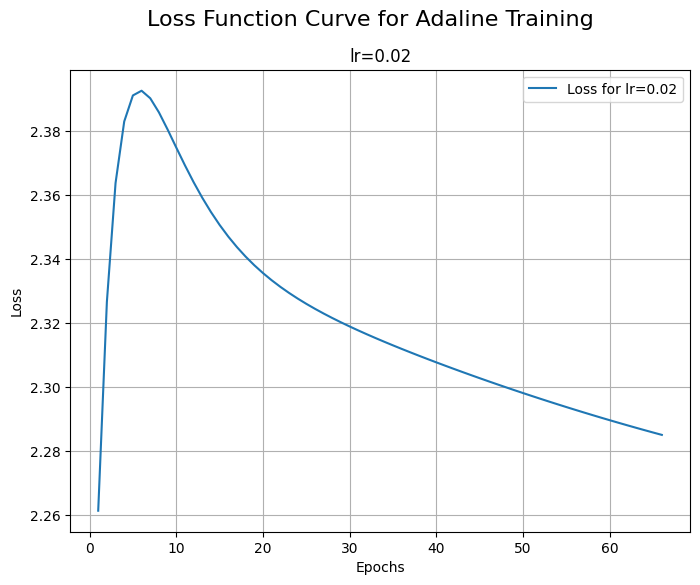

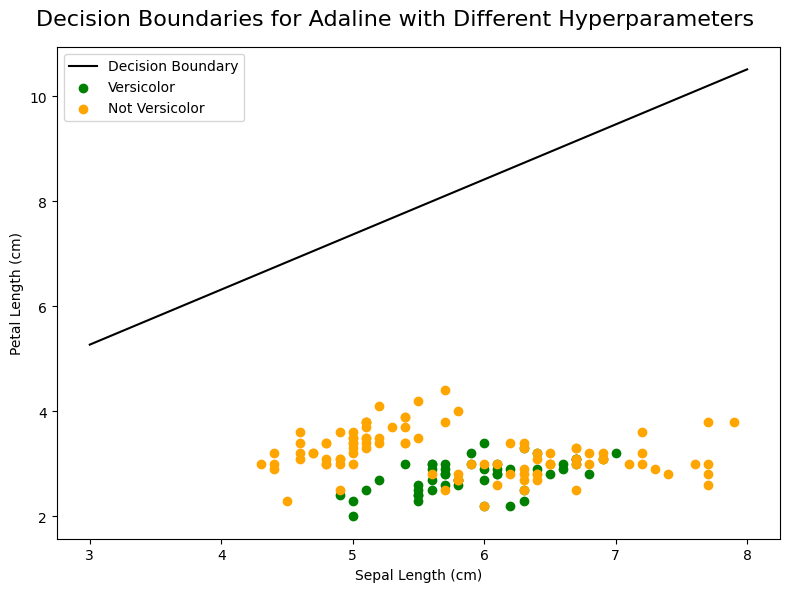

In [24]:
# create a subplot for a single loss curve
fig, axs = plt.subplots(1, 1, figsize=(8, 6))

# set the figure title
fig.suptitle('Loss Function Curve for Adaline Training', fontsize=16)
axs.plot(itr, np.squeeze(error_lst), label=f'Loss for lr={learning_rate}')

# add axis labels
axs.set_title(f'lr={learning_rate}', fontsize=12)
axs.set_xlabel('Epochs')
axs.set_ylabel('Loss')

# add grid
axs.grid(True)

# adjust tick label font size
axs.tick_params(axis='both', which='major', labelsize=10)

# add legend
axs.legend(loc='upper right')

# save the figure
# plt.savefig("LossFunctionCurve_LR_0.01.pdf")

# show the plot
plt.show()
# create subplots for decision boundaries
fig2, axs2 = plt.subplots(1,1, figsize=(8, 6))

# set the figure title
fig2.suptitle('Decision Boundaries for Adaline with Different Hyperparameters', fontsize=16)

# plot the weight and bias separation lines

px1, px2 = SeparationLine(3, 8, w2, b2)
axs2.plot(px1, px2, label='Decision Boundary', color='black')
# Scatter plot for Setosa data
# Scatter plot for Versicolor data
axs2.scatter(versicolor_data['sepal length (cm)'], versicolor_data['sepal width (cm)'], label='Versicolor', color='green')

# Scatter plot for non-Versicolor data
axs2.scatter(not_versicolor_data['sepal length (cm)'], not_versicolor_data['sepal width (cm)'], label='Not Versicolor', color='orange')
# Set labels and legend
axs2.set_xlabel('Sepal Length (cm)')
axs2.set_ylabel('Petal Length (cm)')
axs2.legend(loc='upper left')

# adjust subplot spacing
fig2.tight_layout()


# show the plot
plt.show()